In [75]:
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from mlxtend.preprocessing import minmax_scaling
df = pd.read_csv(r"C:\Users\Ruba\OneDrive - Master Electronics\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\Ruba\OneDrive - Master Electronics\Desktop\test.csv")

In [76]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB
(43152, 11)


In [77]:
# View statistical summary about the data
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [78]:
df.isna().sum()
# No null value

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [79]:
# # converting all string columns to lower case in order to have all the values in same format
# df['clarity'] = df['clarity'].str.lower()
# df['cut'] = df['cut'].str.lower()
# df['color'] = df['color'].str.lower()

# test['clarity'] = test['clarity'].str.lower()
# test['cut'] = test['cut'].str.lower()
# test['color'] = test['color'].str.lower()
# dropping all zero values assuming there are faults in data
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)


In [80]:
print('Number of cuts in Diamonds:', df['cut'].nunique())
print('Number of colors in Diamonds:', df['color'].nunique())
print('Number of categories of clarity in Diamonds:', df['clarity'].nunique())

Number of cuts in Diamonds: 5
Number of colors in Diamonds: 7
Number of categories of clarity in Diamonds: 8


In [81]:
# finding number of categories and subcategories in the categorical data
print('Number of cuts in each category in Diamonds:\n', df['cut'].value_counts())
print('Number of sub categories in each clarity level in Diamonds:\n', df['clarity'].value_counts())
print('Number of diamonds with available colors in Diamonds:\n', df['color'].value_counts())

Number of cuts in each category in Diamonds:
 Ideal        17201
Premium      11103
Very Good     9657
Good          3878
Fair          1296
Name: cut, dtype: int64
Number of sub categories in each clarity level in Diamonds:
 SI1     10426
VS2      9821
SI2      7424
VS1      6474
VVS2     4041
VVS1     2904
IF       1442
I1        603
Name: clarity, dtype: int64
Number of diamonds with available colors in Diamonds:
 G    9053
E    7832
F    7630
H    6645
D    5421
I    4264
J    2290
Name: color, dtype: int64


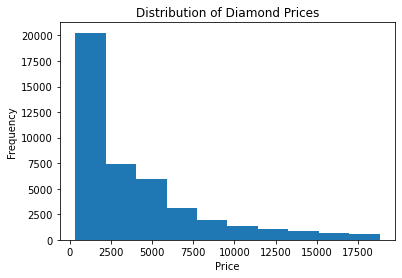

In [82]:
import matplotlib.pyplot as plt

# create a histogram of diamond prices to visualize the diamond prices
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()


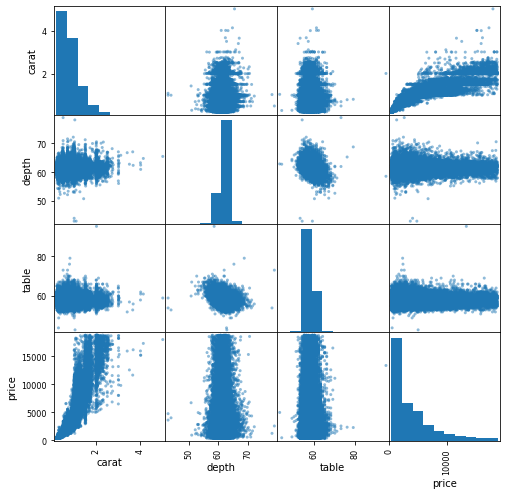

In [83]:
pd.plotting.scatter_matrix(df[['carat', 'depth', 'table', 'price']], figsize=(8, 8))
plt.show()

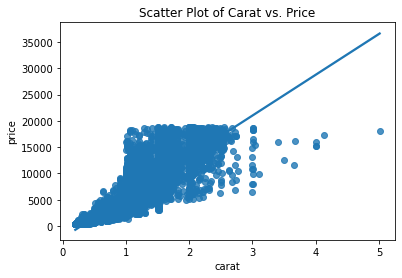

In [84]:
import seaborn as sns

# create a scatter plot of carat vs. price with a regression line
sns.regplot(x='carat', y='price', data=df)
plt.title('Scatter Plot of Carat vs. Price')
plt.show()


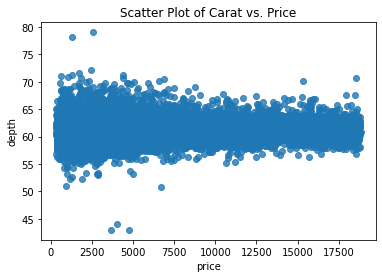

In [85]:
import seaborn as sns

# create a scatter plot of carat vs. price with a regression line
sns.regplot(x='price', y='depth', data=df)
plt.title('Scatter Plot of Carat vs. Price')
plt.show()


C:\Users\Ruba\AppData\Local\Temp\ipykernel_13180\3740468038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


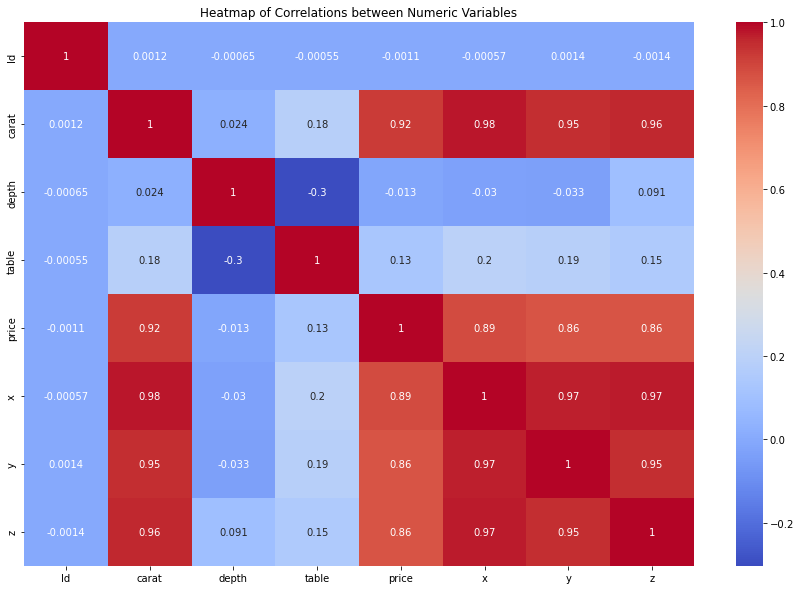

In [86]:
# create a heatmap of correlations between numeric variables to see the relationship between them
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlations between Numeric Variables')
plt.show()


In [87]:
# # Handling outliers
# from scipy.stats import zscore

# # compute z-scores for numeric variables
# df_numeric = df.select_dtypes(include=['float64', 'int64'])
# df_zscores = df_numeric.apply(zscore)

# # identify outliers with z-score > 3
# outliers = (df_zscores > 3).any(axis=1)

# # remove outliers from the data
# df_clean = df[~outliers]
# df = df_clean
# # print the shape of the original and cleaned data
# print(f'Original Data Shape: {df.shape}')
# print(f'Cleaned Data Shape: {df_clean.shape}')


In [88]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

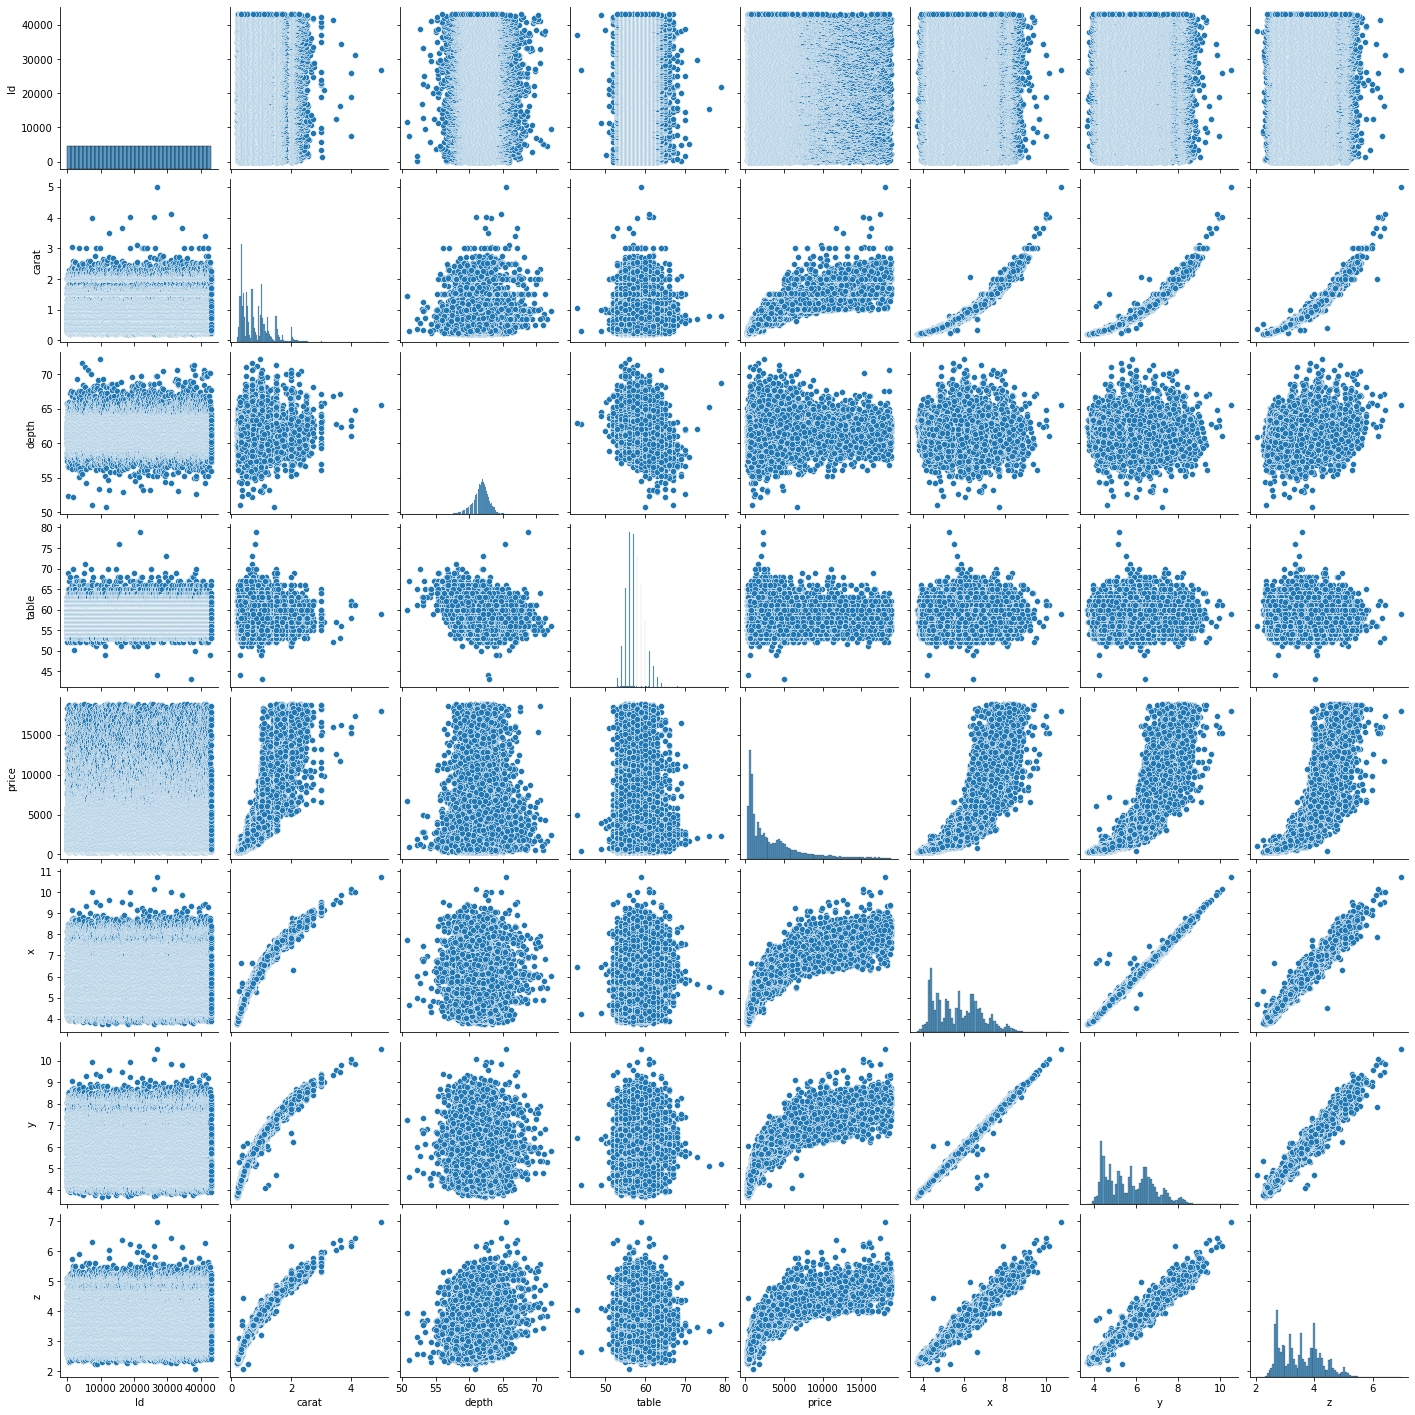

In [89]:
# let's visualize the data as a whole
sns.pairplot(df)

# training a randomforest model

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the training data
df_train = df

# Load the test data
df_test = test

# Drop 'id' column as it doesn't provide any useful information
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

# Convert categorical variables to numerical using one-hot encoding
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

# Make sure that both dataframes have the same columns after one-hot encoding
missing_cols = set(df_train.columns) - set(df_test.columns)
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[df_train.columns]

# Split dataset into X and y
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

# Create Random Forest Regressor model and fit on training data
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 5597.440885005785


# optimizing the results using cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load the data
df_train = df
df_test = test

# Drop 'id' column as it doesn't provide any useful information
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

# Convert categorical variables to numerical using one-hot encoding
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

# Make sure that both dataframes have the same columns after one-hot encoding
missing_cols = set(df_train.columns) - set(df_test.columns)
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[df_train.columns]

# Split dataset into X and y
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

# Create Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=300, random_state=42)

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error from the cross-validation scores
rmse = (-1 * cv_scores.mean()) ** 0.5

print(f"Root Mean Squared Error: {rmse}")


# optimizing using ensembles

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
df_train = df
df_test = test

# Drop 'id' column as it doesn't provide any useful information
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

# Convert categorical variables to numerical using one-hot encoding
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

# Make sure that both dataframes have the same columns after one-hot encoding
missing_cols = set(df_train.columns) - set(df_test.columns)
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[df_train.columns]

# Split dataset into X and y
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

# Create pipeline with StandardScaler and RandomForestRegressor
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor(n_estimators=500, random_state=42))])

# Wrap the pipeline inside TransformedTargetRegressor for scaling the target variable
regressor = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error from the cross-validation scores
rmse = (-1 * cv_scores.mean()) ** 0.5

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 556.3556143866856


In [92]:
# Fit the model to the entire training dataset
regressor.fit(X_train, y_train)

# Predict the prices for the test dataset
y_pred = regressor.predict(X_test)

# Create a DataFrame with Id and predicted prices columns
submission_df = pd.DataFrame({'Id': test['Id'], 'price': y_pred})

# Save the DataFrame to a CSV file with the required format
submission_df.to_csv('submission.csv', index=False, header=True, columns=['Id', 'price'])


In [93]:
import os
print(os.getcwd())


C:\Users\Ruba\anaconda3\conda-meta
